# Реализация метода главных компонент (PCA - Principal Component Analysis)

**один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации**

In [ ]:
# библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Рассмотрим данные о раковых опухолях, которые были удалены во время биопсии. Какие-то опухоли были доьрокачественными, а какие-то злокачественные. В нашем датасете приведены различные змерения для этих опухолей.

In [ ]:
df = pd.read_csv(r"cancer_tumor_data_features.csv")

In [22]:
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


В данных 30 колонок (признаков). Визуализировать их довольно сложно. Попробуем уменьшить количество признаков. Сделаем переход от эт этих 30 призаков к преобразованным 30 признакам и далее возьмем некоторые из них. 

**Проведем масштабирование признаков**

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
scaled_X = scaler.fit_transform(df)

**Создадим и обучим модель РСА**

In [26]:
from sklearn.decomposition import PCA

Главный параметр в методе - количество компонентов. Выберем 2 для данной задачи.

In [27]:
pca_model = PCA(n_components=2)

In [28]:
pca_model.fit(scaled_X)

PCA(n_components=2)

метод fit вычисляет собственные вектора и собственные значения

In [29]:
pca_model.transform(scaled_X)

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

метод transform проецирует исходные данные в уменьшенное пространство главных компонент 

Можно и так: pca_model.fit_transform(scaled_X)

In [30]:
pc_results = pca_model.fit_transform(scaled_X)

Спроецируем по оси x первую колонку с индексом 0, а по оси у вторую колонку с индексом 1. 

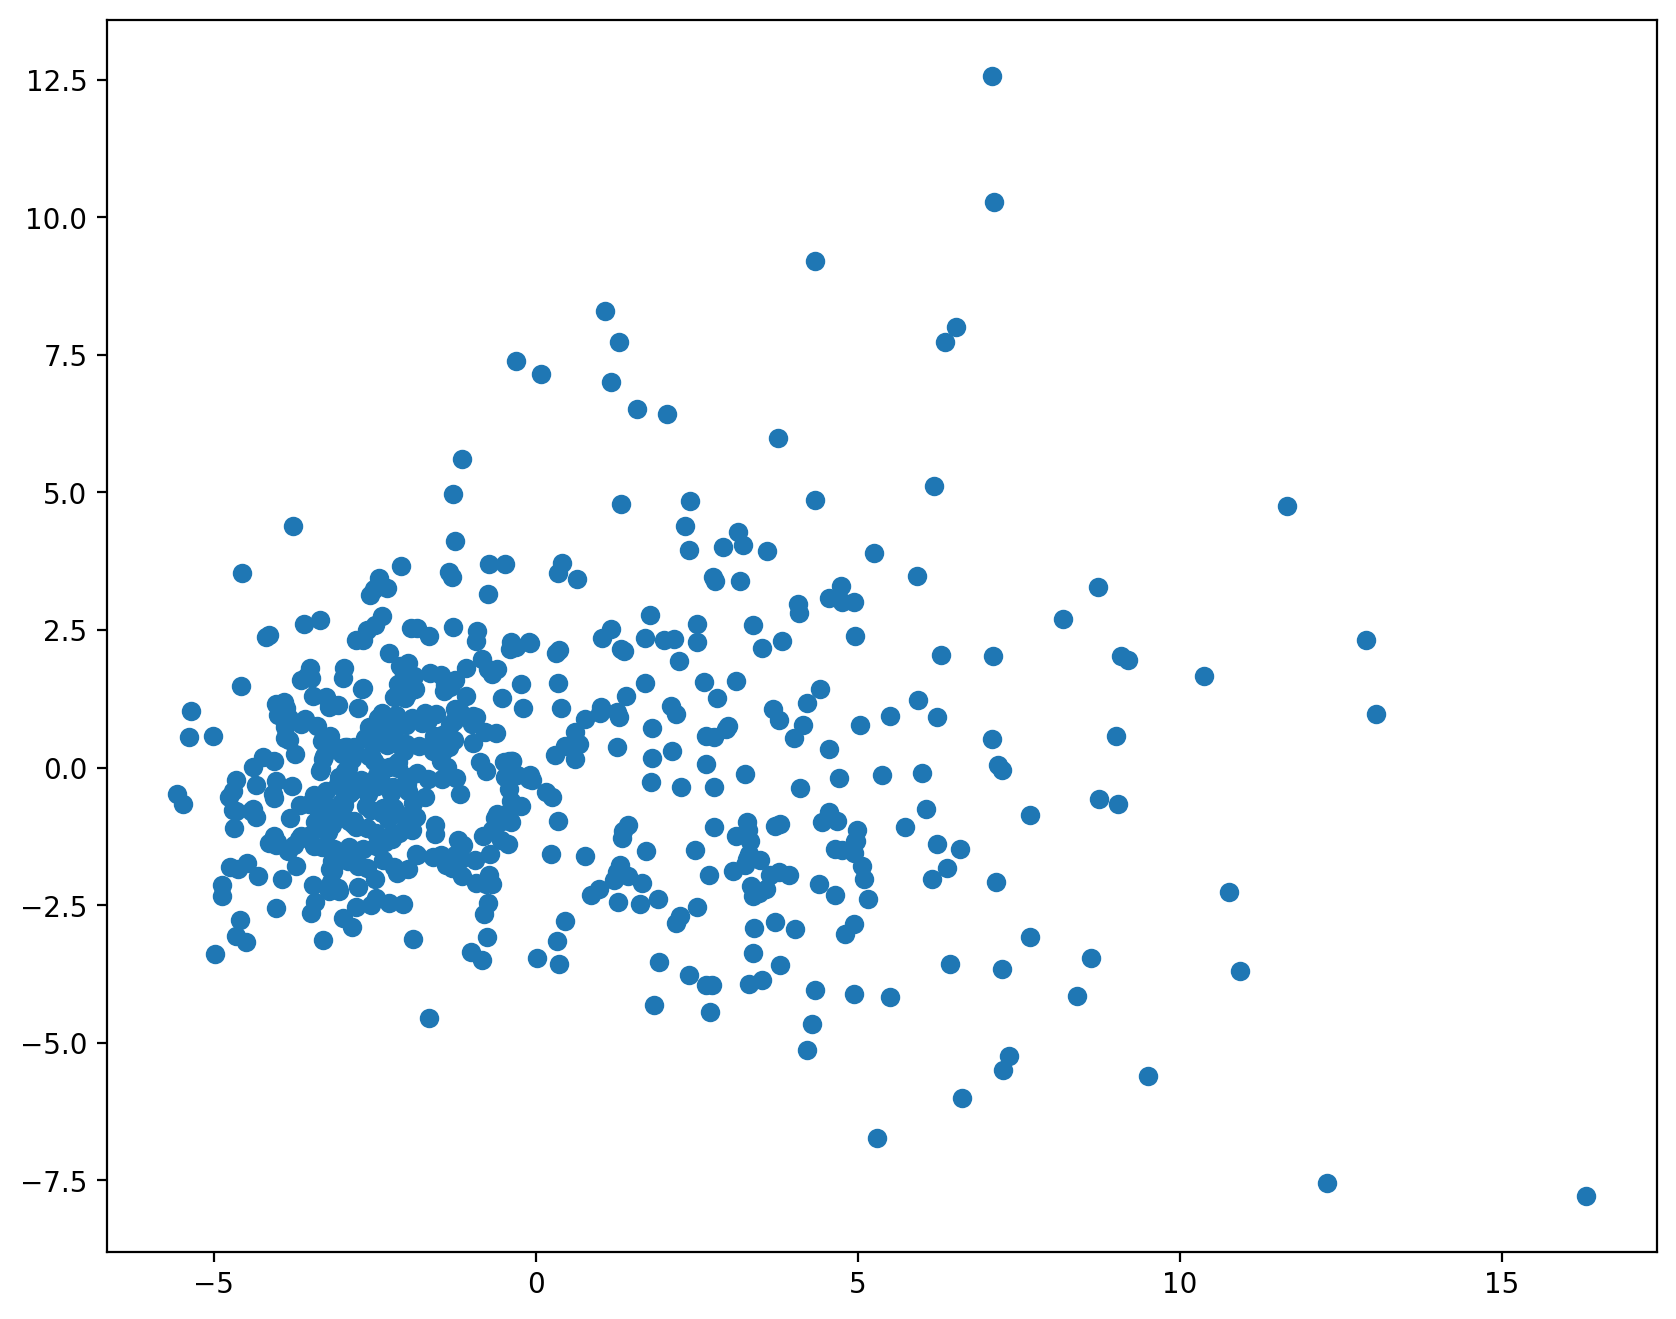

In [31]:
plt.figure(figsize=(10, 8), dpi=200)
plt.scatter(pc_results[:, 0], pc_results[:, 1])

Раскрасим данные по целевой переменной target. Загрузим датасет.

In [32]:
from sklearn.datasets import load_breast_cancer

In [33]:
cancer_dictionary = load_breast_cancer()

In [34]:
cancer_dictionary.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

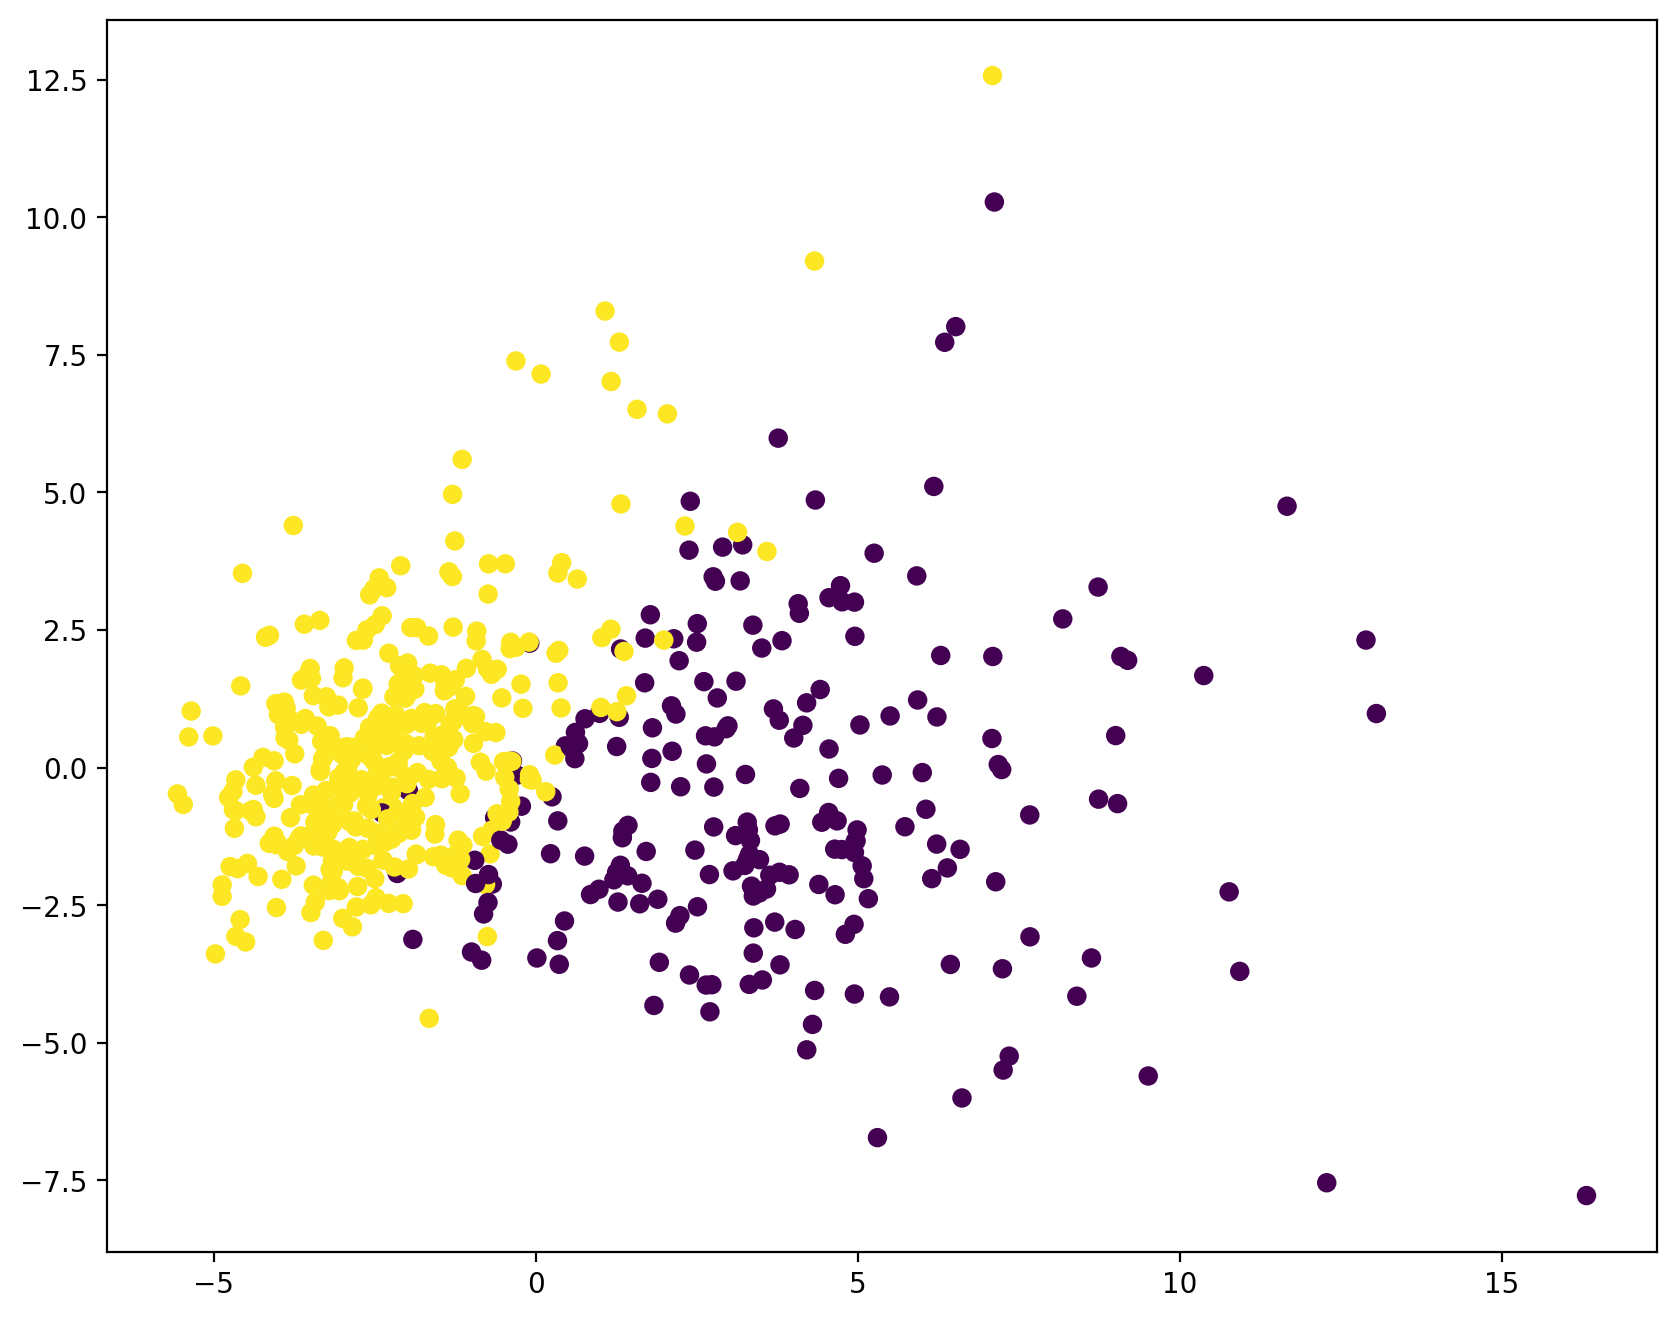

In [35]:
plt.figure(figsize=(10, 8), dpi=200)
plt.scatter(pc_results[:, 0], pc_results[:, 1], c=cancer_dictionary['target'])

Посмотрим на атрибут направления максимальной вариативности наших данных

In [36]:
pca_model.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [37]:
pca_model.components_.shape

(2, 30)

In [38]:
df_components = pd.DataFrame(pca_model.components_, index=['PC1', 'PC2'], columns=df.columns)

In [39]:
df_components

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


<Axes: >

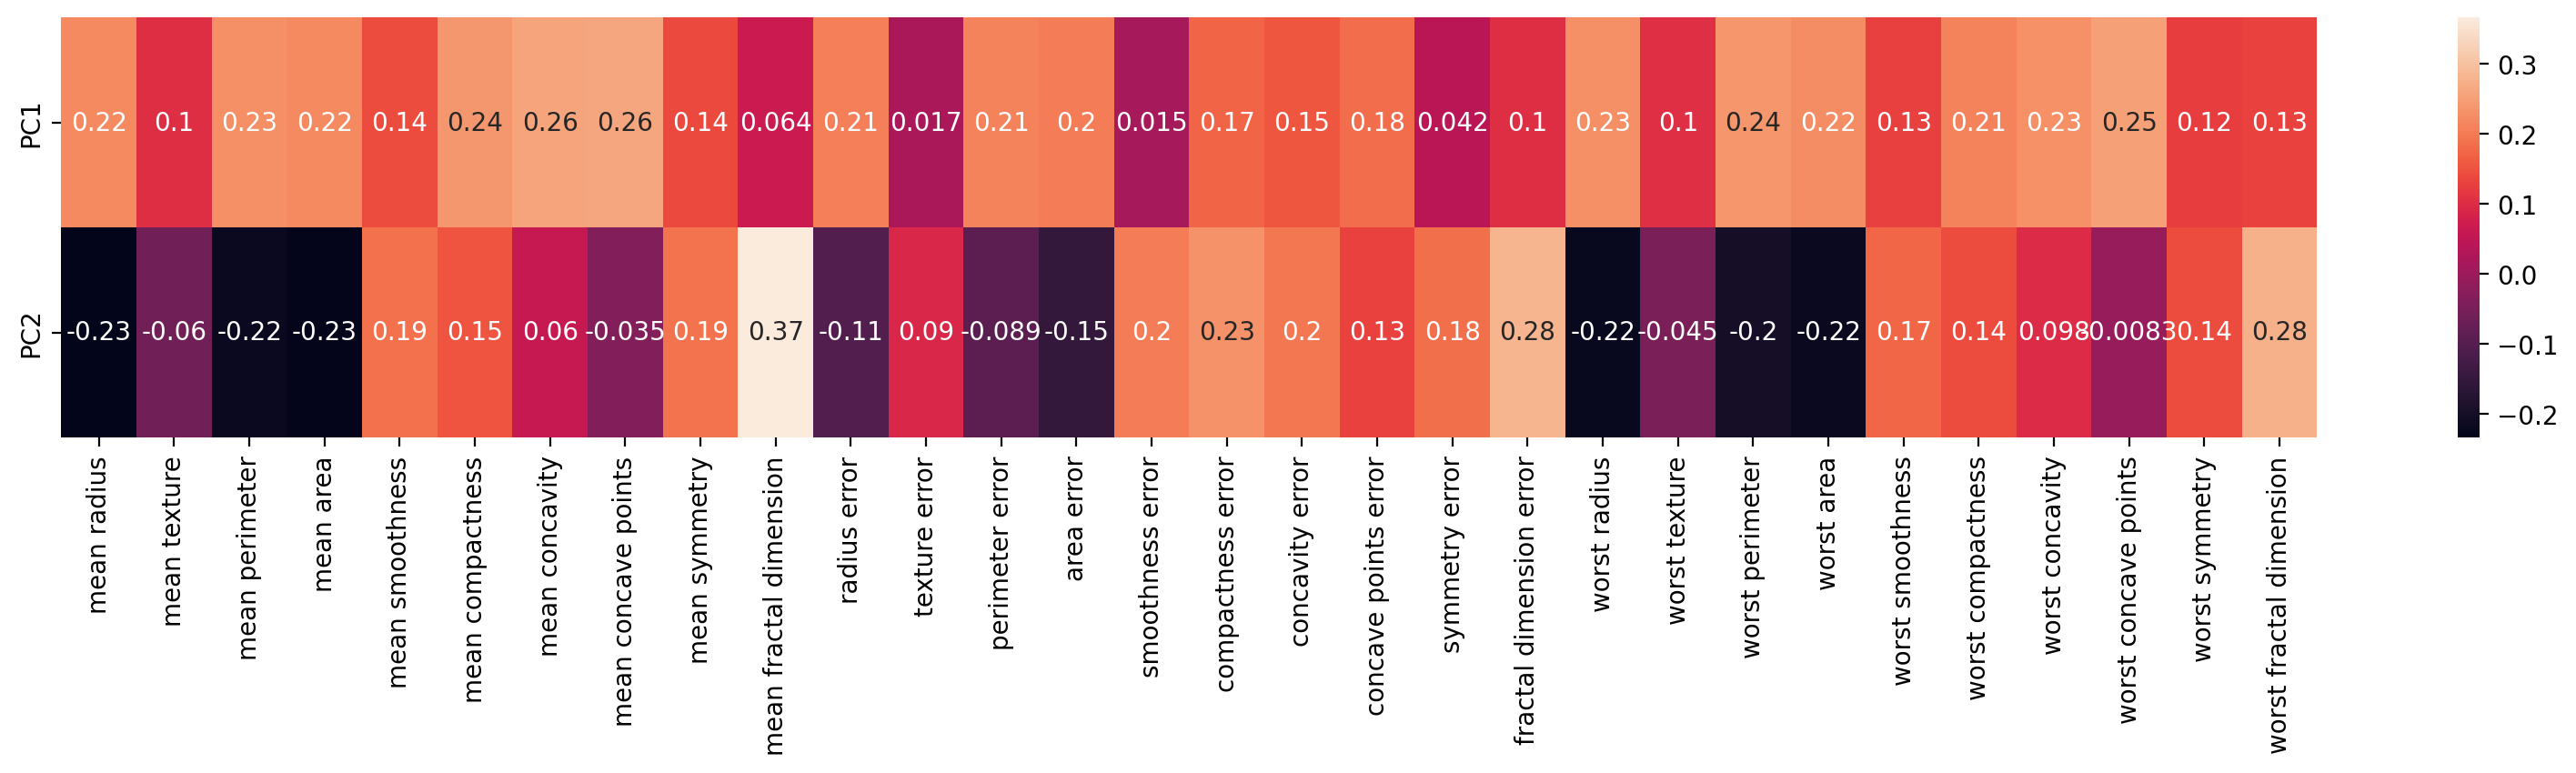

In [40]:
plt.figure(figsize=(20, 3), dpi=200)
sns.heatmap(df_components, annot=True)

Посмотрим на атрибут вариативности наших данных в долях

In [41]:
pca_model.explained_variance_ratio_

array([0.44272026, 0.18971182])

Мы видим, что первый главный компонент объясняет 44% вариативности наших данных, а второй компонент объясняет 18,9% вариативности наших данных. 

In [42]:
np.sum(pca_model.explained_variance_ratio_)

np.float64(0.6324320765155944)

Всего 2 компонента могут объяснить 63% вариативности наших данных.

**Увеличим количество главных компонентов и посмотрим на вариативность**

In [44]:
pca_30 = PCA(n_components=30)
pca_30.fit(scaled_X)

PCA(n_components=30)

In [45]:
np.sum(pca_30.explained_variance_ratio_)

np.float64(1.0000000000000002)

Мы не уменьшили размерность пространства и получили вариативность 100%

Посмотрим промежуточные значения и построим график. Этот метод можно использовать как метод локтя для подбора гиперпараметров

In [47]:
explained_variance = []

for n in range(1, 30):
    pca = PCA(n_components=n)
    pca.fit(scaled_X)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

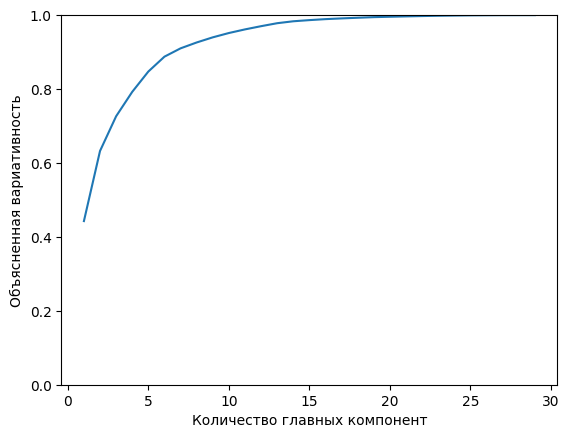

In [48]:
plt.plot(range(1, 30), explained_variance)
plt.xlabel('Количество главных компонент')
plt.ylabel('Объясненная вариативность')
plt.ylim(0, 1);

Мы видим, что в случае одной компоненты мы получаем около 40%. В районе 10 компонент мы начинаем выходить на плато, когда дополнительные компоненты добовляют всё меньше и меньше вариативности. 